In [2]:
%run _common.ipynb

import jax
from jax import Array
import jax.numpy as jnp
import equinox as eqx
import optax
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from neuralconstitutive.constitutive import FromLogDiscreteSpectrum
from neuralconstitutive.relaxation_spectrum import HonerkampWeeseBimodal
from neuralconstitutive.pyRespect import estimate_continous_spectrum
from neuralconstitutive.jax.tipgeometry import Spherical, AbstractTipGeometry
from neuralconstitutive.trajectory import Trajectory, make_triangular
from neuralconstitutive.jax.ting import force_approach, force_retract
from neuralconstitutive.nn import FullyConnectedNetwork
from neuralconstitutive.models import BernsteinNN
from neuralconstitutive.training import loss_total, train_model


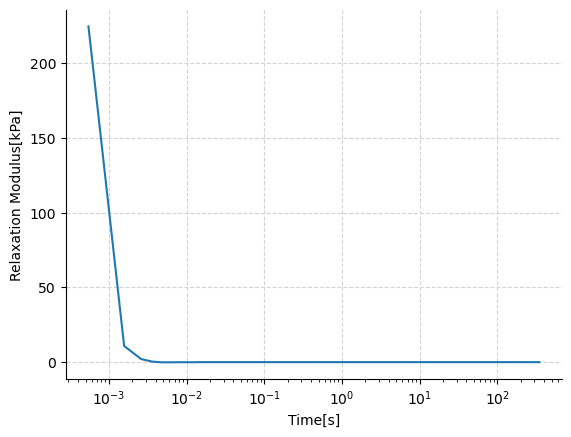

In [21]:
stress_relaxation = pd.read_csv("collagen_sample(stress relaxation).txt", delimiter="\t", header = [0, 1], skiprows=119, engine = "c")
time = stress_relaxation["Step time"].to_numpy()
modulus = stress_relaxation["Modulus"].to_numpy()
time = time.reshape((len(time)))
modulus = modulus.reshape((len(modulus)))
plt.plot(time[1:], modulus[1:])
plt.xlabel("Time[s]")
plt.ylabel("Relaxation Modulus[kPa]")
plt.xscale('log')

Interpolating t, G to 100 points
Interpolating t, G to 200 points
Interpolating t, G to 500 points


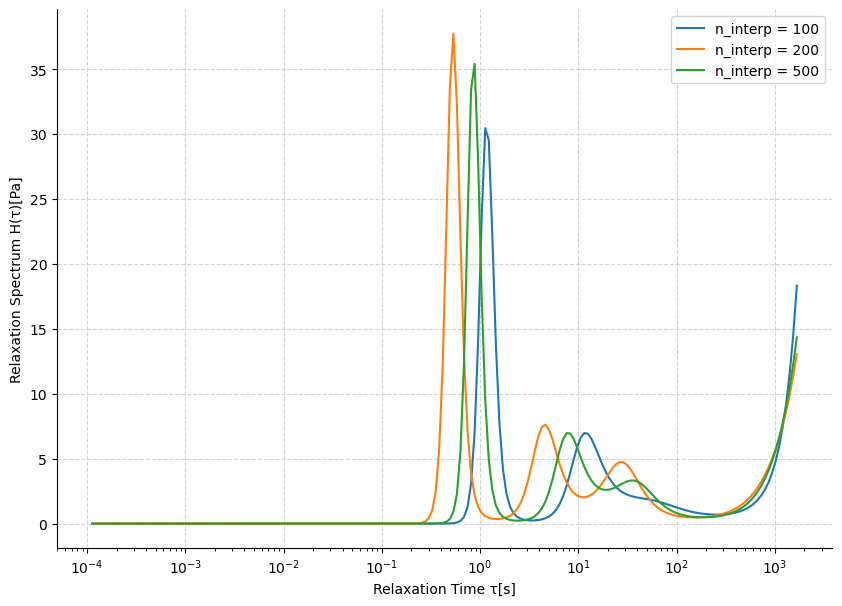

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot()
for n_interp in (100, 200, 500):
    t_estimated, h_estimated, _ = estimate_continous_spectrum(
        time[1:], modulus[1:], n_interpolation=n_interp, n_spectrum_points=200
    )
    ax.plot(
        t_estimated,
        h_estimated,
        # ".",
        alpha=1.0,
        label=f"n_interp = {n_interp}",
    )
ax.set_xscale("log", base=10)
ax.set_xlabel("Relaxation Time τ[s]")
ax.set_ylabel("Relaxation Spectrum H(τ)[Pa]")
ax.legend()

Interpolating t, G to 500 points


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


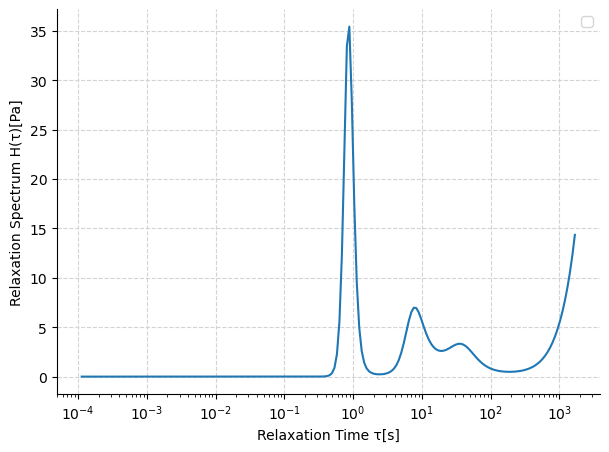

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
t_estimated, h_estimated, _ = estimate_continous_spectrum(time[1:], modulus[1:], n_interpolation=500, n_spectrum_points=200)
ax.plot(t_estimated,h_estimated, alpha=1.0)
ax.set_xscale("log", base=10)
ax.set_xlabel("Relaxation Time τ[s]")
ax.set_ylabel("Relaxation Spectrum H(τ)[Pa]")